In [1]:
import pandas as pd 
import numpy as np

In [2]:
np. random.seed(42)
n_students = 500
data = {
    'Student_id' : range(1, n_students +1),
    'Gender' : np.random.choice(['Male', 'Female'], n_students), 
    'Absenteeism' : np.random.randint(0, 20, n_students),
    'Weekly_Reading_Hours' : np.random.randint(1, 15, n_students),
    'Exam_Average' : np.random.uniform(200, 480, n_students),
    'Math_Score' : np.random.randint(0, 20, n_students), 
}

df = pd.DataFrame(data)

df['LGS_Score'] = (df['Exam_Average'] * 0.65) + (df['Math_Score'] * 6) - (df['Absenteeism'] * 1.5) + (df['Weekly_Reading_Hours'] * 2) + np.random.normal(0, 10, n_students)
df['LGS_Score'] = df['LGS_Score'].clip(200, 500).round(2)
                        
print("The first 5 rows of the dataset")
print(df.head())

The first 5 rows of the dataset
   Student_id  Gender  Absenteeism  Weekly_Reading_Hours  Exam_Average  \
0           1    Male            0                     4    317.255747   
1           2  Female            2                     8    307.278788   
2           3    Male           17                     6    345.296957   
3           4    Male            9                     2    213.150471   
4           5    Male            2                     4    246.559343   

   Math_Score  LGS_Score  
0          11     275.38  
1           7     251.42  
2          13     291.05  
3           3     200.00  
4           0     200.00  


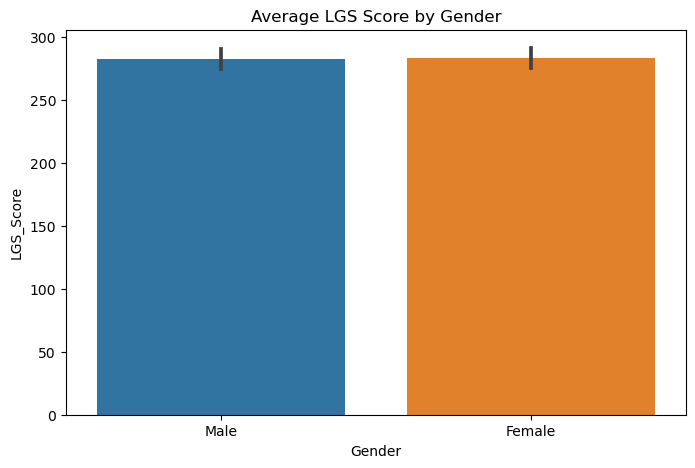

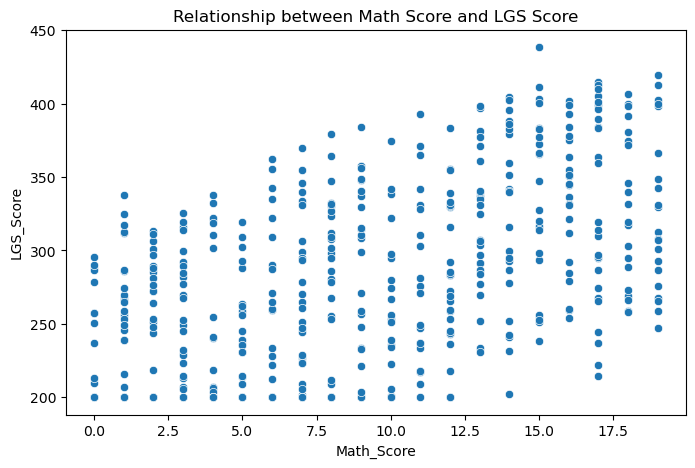

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.barplot(x='Gender', y = 'LGS_Score', data = df)
plt.title('Average LGS Score by Gender')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Math_Score', y = 'LGS_Score', data = df)
plt.title('Relationship between Math Score and LGS Score')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

x = df.drop(['Student_id', 'LGS_Score'], axis = 1)
y = df['LGS_Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("Trainin set size:", x_train.shape)
print("Test set size:", x_test.shape)
print("\nThe Original form of the converted data:")
print(x_train.head())

Trainin set size: (400, 5)
Test set size: (100, 5)

The Original form of the converted data:
     Gender  Absenteeism  Weekly_Reading_Hours  Exam_Average  Math_Score
249       1           12                     1    290.610861          19
433       0            2                    12    236.644625           4
19        1            9                     8    260.183306          12
322       0           16                    14    267.772604          12
332       0           16                    14    224.602620          13


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model Success Score (r2 Score): {r2 : 4f}")
print(f"Avg Error(MAE) : {mae: .2f} score")

Model Success Score (r2 Score):  0.950272
Avg Error(MAE) :  10.65 score


In [6]:

importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)



                Feature  Importance
4            Math_Score    5.251465
2  Weekly_Reading_Hours    1.734995
3          Exam_Average    0.581087
0                Gender   -0.490984
1           Absenteeism   -1.147411


In [7]:

new_student = [[0, 2, 10, 450, 18]] 

prediction = model.predict(new_student)
print(f"Prediction Lgs_Score: {prediction[0]:.2f}")

Prediction Lgs_Score: 405.14


/Users/gizem/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
